In [3]:
from pyspark.sql.functions import *
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

from pyspark.mllib.classification import SVMModel, SVMWithSGD
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.linalg import Vectors as MLLibVectors
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import * 
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder


from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

import pandas as pd
import string 
import re 

In [5]:
review = spark.read.parquet("src=s3://mukeshproj/Topic_modelling_pipeline_backup/topic_modelling_parquet_pipeline/shrink_data_piprline_backup/")

NameError: name 'spark' is not defined

In [0]:
dbutils.fs.mkdirs("dbfs:/databricks/scripts/")

Out[5]: True

In [0]:
dbutils.fs.put("/databricks/scripts/nltk-install.sh",""" #!/bin/bash python -m pip install nltk python -m pip install --upgrade pip python -m nltk.downloader all """, True)

Wrote 106 bytes.
Out[6]: True

In [0]:
display(dbutils.fs.ls("/databricks/scripts/nltk-install.sh"))

path,name,size
dbfs:/databricks/scripts/nltk-install.sh,nltk-install.sh,106


In [0]:
!pip install s3fs

In [0]:
review.cache()

Out[9]: DataFrame[business_id: string, cool: bigint, date: string, funny: bigint, review_id: string, stars: double, text: string, useful: bigint, user_id: string]

In [0]:
# remove punctuation
def remove_punct(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text) 
    return nopunct
    
# binarize rating
def convert_rating(rating):
    rating = int(rating)
    if rating < 2: return 1
    else: return 0

# udf
punct_remover = udf(lambda x: remove_punct(x))
rating_convert = udf(lambda x: convert_rating(x))
review_df = review.select('review_id', punct_remover('text'), rating_convert('stars'))
review_df = review_df.withColumnRenamed('<lambda>(text)', 'text')\
                     .withColumn('label', review_df["<lambda>(stars)"].cast(IntegerType()))\
                     .drop('<lambda>(stars)')\
                     .limit(5000)

In [0]:
review_df.show()

+--------------------+--------------------+-----+
|           review_id|                text|label|
+--------------------+--------------------+-----+
|lWC-xP3rd6obsecCY...|Apparently Prides...|    0|
|8bFej1QE5LXp4O05q...|This store is pre...|    0|
|NDhkzczKjLshODbqD...|I called WVM on t...|    0|
|T5fAqjjFooT4V0OeZ...|I ve stayed at ma...|    0|
|sjm_uUcQVxab_EeLC...|The food is alway...|    0|
|J4a2TuhDasjn2k3wW...|This place used t...|    1|
|28gGfkLs3igtjVy61...|The setting is pe...|    0|
|9vqwvFCBG3FBiHGmO...|Probably one of t...|    0|
|2l_TDrQ7p-5tANOyi...|I am definitely a...|    0|
|KKVFopqzcVfcubIBx...|I work in the Pru...|    0|
|FdoBFTjXXMn4hVnJ5...|They NEVER seem t...|    1|
|Qv_lQb1Yu9DGsUO3r...|Disappointing  Bo...|    0|
|Gi5LSRmTXoL9Bp4jN...|I have been here ...|    0|
|m1GlqFGIN5eayrbb2...|I wish I could gi...|    1|
|j_eh6Iw7qseluR-7K...|This is a five st...|    0|
|egHMQBhFeaLhVyC6w...|Quickly stopped i...|    0|
|LBJJWJ0uNlIybMfPn...|I loved everythin...|    0|


In [0]:
df=review_df.filter(review_df.label=='1')

In [0]:
#df.show(10)

In [0]:
df_badreviews=df.toPandas()

In [0]:
texts = []
for review in df_badreviews.text:
    texts.append(review)

In [0]:
texts

Out[16]: ['This place used to be a cool  chill place  Now its a bunch of neanderthal bouncers hopped up on steroids acting like the can do whatever they want  There are so many better places in davis square where they are glad you are visiting their business  Sad that the burren is now the worst place in davis ',
 'They NEVER seem to get our  order correct  service is crappy  food is inconsistent and has gone down hill steadily in the last     months  WILL NEVER GO THERE AGAIN ',
 'I wish I could give them zero stars  The call takers are rude  The technicians are incompetent  The manager doesn t know what customer service is  It is overpriced  I was quoted       I went to another locksmith  who actually got my lock off  and was quoted a total of       The technician was late twice  He could not pick the lock which is not unusual and said he would have to drill through the lock  Ok  But  failed to bring charged batteries  He never offered to come back with charged batteries as soon as h

In [0]:
#Cleaning techniques #1 : Tokenization

In [0]:
import pandas as pd
import json
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [0]:
def tokenize(texts):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    texts_tokens = []
    for i, val in enumerate(texts):
        text_tokens = tokenizer.tokenize(val.lower())

        for i in range(len(text_tokens) - 1, -1, -1):
            if len(text_tokens[i]) < 4:
                del(text_tokens[i])

        texts_tokens.append(text_tokens)
        
    return texts_tokens

In [0]:
texts_tokens = tokenize(texts)

texts_tokens[:1]

Out[20]: [['this',
  'place',
  'used',
  'cool',
  'chill',
  'place',
  'bunch',
  'neanderthal',
  'bouncers',
  'hopped',
  'steroids',
  'acting',
  'like',
  'whatever',
  'they',
  'want',
  'there',
  'many',
  'better',
  'places',
  'davis',
  'square',
  'where',
  'they',
  'glad',
  'visiting',
  'their',
  'business',
  'that',
  'burren',
  'worst',
  'place',
  'davis']]

In [0]:
!pip install nltk

In [0]:
#Cleaning techniques #2 : Removing stopwords

In [0]:
def removeSW(texts_tokens):
    stopWords = set(stopwords.words('english'))
    texts_filtered = []

    for i, val in enumerate(texts_tokens):
        text_filtered = []
        for w in val:
            if w not in stopWords:
                text_filtered.append(w)
        texts_filtered.append(text_filtered)
        
    return texts_filtered

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Out[24]: True

In [0]:
texts_filtered = removeSW(texts_tokens)
texts_filtered[:1]

Out[25]: [['place',
  'used',
  'cool',
  'chill',
  'place',
  'bunch',
  'neanderthal',
  'bouncers',
  'hopped',
  'steroids',
  'acting',
  'like',
  'whatever',
  'want',
  'many',
  'better',
  'places',
  'davis',
  'square',
  'glad',
  'visiting',
  'business',
  'burren',
  'worst',
  'place',
  'davis']]

In [0]:
len(texts_filtered)

Out[26]: 598

In [0]:
#Cleaning techniques #3 : Lemma

In [0]:
def lemma(texts_filtered):
    wordnet_lemmatizer = WordNetLemmatizer()
    texts_lem = []

    for i, val in enumerate(texts_filtered):
        text_lem = []
        for word in val:
            text_lem.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        texts_lem.append(text_lem)
    
    return texts_lem

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Out[29]: True

In [0]:
texts_lem = lemma(texts_filtered)

texts_lem[:1]

Out[30]: [['place',
  'use',
  'cool',
  'chill',
  'place',
  'bunch',
  'neanderthal',
  'bouncers',
  'hop',
  'steroids',
  'act',
  'like',
  'whatever',
  'want',
  'many',
  'better',
  'place',
  'davis',
  'square',
  'glad',
  'visit',
  'business',
  'burren',
  'worst',
  'place',
  'davis']]

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Out[31]: True

In [0]:
len(texts_lem)

Out[32]: 598

In [0]:
#Joinning

In [0]:
texts_string = []
for text in texts_lem:
    string = ' '
    string = string.join(text)
    texts_string.append(string)

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Out[35]: True

In [0]:
texts_string[:10]

Out[36]: ['place use cool chill place bunch neanderthal bouncers hop steroids act like whatever want many better place davis square glad visit business burren worst place davis',
 'never seem order correct service crappy food inconsistent go hill steadily last months never',
 'wish could give zero star call takers rude technicians incompetent manager know customer service overprice quote go another locksmith actually lock quote total technician late twice could pick lock unusual say would drill lock fail bring charge batteries never offer come back charge batteries soon could offer send someone else say could however come back around hours later table usually need lock need minute say charge service service never receive contact manager seem task say rightfully charge refuse technician offer come back later doubt manager know table payment still reimburse',
 'great coffee pastries baristas excellent staff sooooo lose vacant',
 'almost desolate restaurant dingy evironment star decieving

In [0]:
#LDA analysis with Sklearn

In [0]:
import pandas as pd
import json
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

In [0]:
def plot_top_words(model, feature_names, n_top_words, title):
    #Modified from SKlearn
    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=15)
        ax.tick_params(bottom=False)
        ax.set(xticklabels=[])

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [0]:
vectorizer = CountVectorizer(max_df=0.90, min_df=5)


In [0]:
X = vectorizer.fit_transform(texts_string)
feature_names =  vectorizer.get_feature_names()

X.toarray().shape

Out[41]: (598, 1022)

In [0]:
n_topics = 10

lda = LatentDirichletAllocation(
        n_components=n_topics,
        max_iter=12
)

lda.fit_transform(X)

Out[42]: array([[0.0055567 , 0.00555658, 0.00555713, ..., 0.00555733, 0.00555669,
        0.94998926],
       [0.61847523, 0.00769428, 0.00769448, ..., 0.0076958 , 0.31997102,
        0.00769399],
       [0.06910736, 0.00131605, 0.0013161 , ..., 0.00131606, 0.00131596,
        0.00131598],
       ...,
       [0.00526625, 0.00526366, 0.00526353, ..., 0.00526347, 0.00526431,
        0.95262187],
       [0.0021281 , 0.59348412, 0.0021282 , ..., 0.00212816, 0.00212794,
        0.00212809],
       [0.4218079 , 0.00250061, 0.00250074, ..., 0.0025006 , 0.0025005 ,
        0.00250071]])

In [0]:
lda.n_iter_

Out[43]: 12

In [0]:
#Displaying result of the analysis.

In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, feature_names, no_top_words)

Topic 0:
order food table come service wait minutes time go take
Topic 1:
time place like would order go never say want service
Topic 2:
order food call service back delivery time go leave come
Topic 3:
go food tell like place take make look wait hard
Topic 4:
say call would tell back service time customer come phone
Topic 5:
room clean take stay wait night another hotel much park
Topic 6:
pizza business order make tell place customer well like hour
Topic 7:
card nail even credit tell give charge work would seem
Topic 8:
coffee take taste tacos come time back wait nothing never
Topic 9:
place food like service review good even price go order


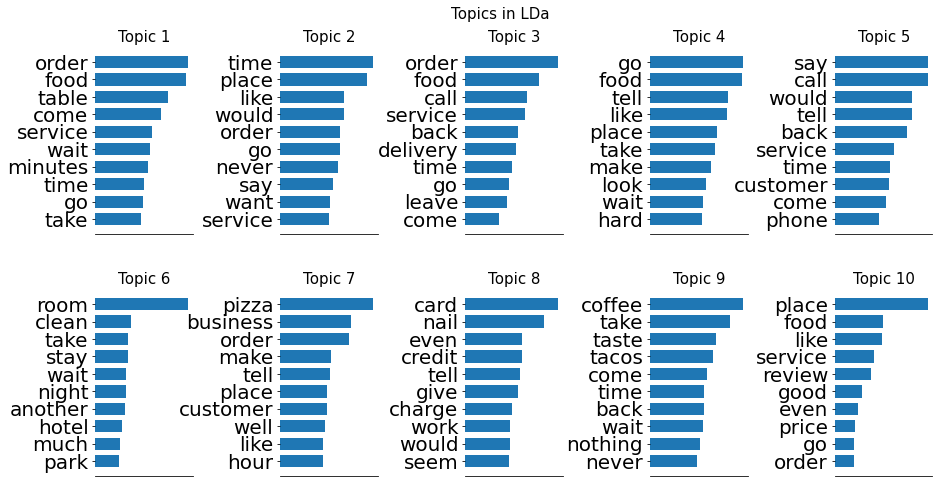

In [0]:
plot_top_words(lda, feature_names, no_top_words,'Topics in LDa')

In [0]:
#NMF analysis with Sklearn

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, 
    min_df=5,  
    stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(texts_string)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [0]:
from sklearn.decomposition import NMF


In [0]:
no_topics = 10

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit_transform(tfidf)

Out[50]: array([[0.06360308, 0.07258249, 0.        , ..., 0.        , 0.        ,
        0.09854132],
       [0.        , 0.04072522, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10136771, 0.        , 0.03009116, ..., 0.06469292, 0.        ,
        0.        ],
       ...,
       [0.        , 0.1016789 , 0.09194781, ..., 0.        , 0.        ,
        0.        ],
       [0.053644  , 0.        , 0.        , ..., 0.11906892, 0.        ,
        0.        ],
       [0.06027713, 0.00220537, 0.05438116, ..., 0.        , 0.        ,
        0.        ]])

In [0]:
no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
say tell like time want know ask place people work
Topic 1:
food place taste good chicken sauce like fry price dish
Topic 2:
table wait restaurant seat host minutes waitress hour party leave
Topic 3:
order delivery deliver hour ready wing answer person food wait
Topic 4:
service customer star time terrible poor slow receive company horrible
Topic 5:
drink burger come server refill feel bartender order hand pack
Topic 6:
room stay hotel night nice smoke kid hair pool park
Topic 7:
card credit charge company refund rental use manager notice additional
Topic 8:
nail polish manicure salon start look color rush remove women
Topic 9:
business twice message value customer support absolutely review understand honestly


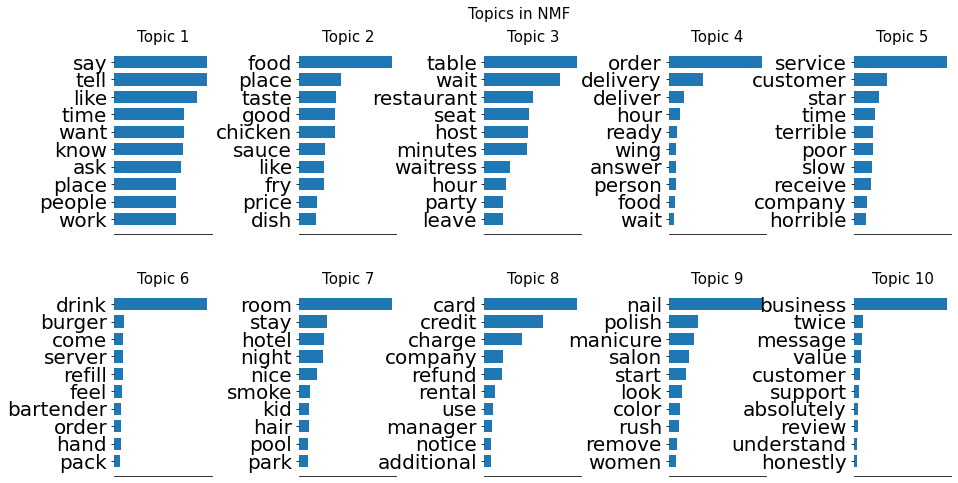

In [0]:
plot_top_words(nmf, tfidf_feature_names, no_top_words,'Topics in NMF')

In [0]:
#LDA BoW and LDA TF-IDF with gensim

In [0]:

import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [0]:
#!pip install pyLDAvis

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
#!pip install -U gensim

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
#pip install --upgrade pip

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
dictionary = gensim.corpora.Dictionary(texts_lem)
len(dictionary.cfs)

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Out[58]: 4800

In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5)
len(dictionary.cfs)

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Out[59]: 399

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in texts_lem]

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(bow_corpus))

Number of unique tokens: 399
Number of documents: 598
/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
#LDA using BoW

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
lda_model_coherence = []
for i in range (2,15):
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=dictionary, passes=2, workers=4)
    cm = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    lda_model_coherence.append(coherence)

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


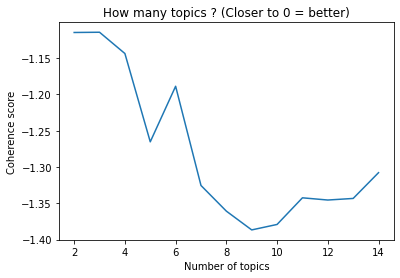

In [0]:
plt.plot(range(2, 15),lda_model_coherence)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.title('How many topics ? (Closer to 0 = better)')
plt.show()

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word=dictionary, passes=2, workers=4)

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.016*"service" + 0.016*"make" + 0.015*"time" + 0.015*"say" + 0.014*"go" + 0.014*"like" + 0.014*"come" + 0.013*"wait" + 0.013*"place" + 0.013*"table"
Topic: 1 Word: 0.021*"order" + 0.019*"say" + 0.019*"tell" + 0.016*"service" + 0.016*"take" + 0.015*"back" + 0.015*"food" + 0.014*"give" + 0.014*"would" + 0.013*"come"
Topic: 2 Word: 0.026*"time" + 0.026*"food" + 0.022*"order" + 0.019*"like" + 0.019*"place" + 0.015*"would" + 0.014*"take" + 0.014*"people" + 0.014*"go" + 0.013*"come"
Topic: 3 Word: 0.037*"place" + 0.023*"order" + 0.022*"like" + 0.019*"time" + 0.018*"even" + 0.013*"look" + 0.012*"make" + 0.012*"wait" + 0.012*"food" + 0.012*"come"
Topic: 4 Word: 0.024*"food" + 0.021*"order" + 0.019*"place" + 0.018*"back" + 0.015*"make" + 0.015*"never" + 0.015*"like" + 0.015*"go" + 0.013*"time" + 0.010*"drink"
Topic: 5 Word: 0.027*"would" + 0.024*"call" + 0.021*"go" + 0.020*"service" + 0.017*"tell" + 0.016*"time" + 0.012*"order" + 0.012*"say" + 0.012*"back" + 0.012*"take"
Topic: 

In [0]:
vis = gensimvis.prepare(topic_model=lda_model, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
#LDA using TF-IDF

In [0]:
lda_model_tfidf_coherence = []
for i in range (2,15):
    lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=i, id2word=dictionary, passes=2, workers=4)
    cm = gensim.models.CoherenceModel(model=lda_model_tfidf, corpus=bow_corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    lda_model_tfidf_coherence.append(coherence)

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


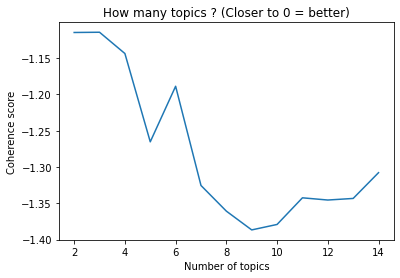

In [0]:
plt.plot(range(2, 15),lda_model_coherence)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.title('How many topics ? (Closer to 0 = better)')
plt.show()

In [0]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Topic: 0 Word: 0.011*"order" + 0.010*"food" + 0.010*"roll" + 0.009*"place" + 0.008*"pay" + 0.008*"bring" + 0.008*"pizza" + 0.008*"bartender" + 0.008*"wait" + 0.007*"need"
Topic: 1 Word: 0.011*"chicken" + 0.011*"place" + 0.010*"table" + 0.010*"close" + 0.009*"food" + 0.009*"sauce" + 0.009*"like" + 0.009*"terrible" + 0.008*"visit" + 0.008*"staff"
Topic: 2 Word: 0.012*"order" + 0.010*"food" + 0.010*"minutes" + 0.009*"place" + 0.009*"sandwich" + 0.009*"take" + 0.008*"service" + 0.008*"restaurant" + 0.007*"time" + 0.007*"come"
Topic: 3 Word: 0.012*"food" + 0.010*"business" + 0.009*"wait" + 0.009*"seat" + 0.008*"go" + 0.008*"tell" + 0.0

In [0]:
vis = gensimvis.prepare(topic_model=lda_model_tfidf, corpus=corpus_tfidf, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
#Scoring topics on documents

In [0]:
for i in range(0,3):
    print('### Scoring the document', i)
    for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: -1*tup[1]):
        print("Score: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 5)), '\n')

### Scoring the document 0
Score: 0.932581901550293	 
Topic: 0.037*"place" + 0.023*"order" + 0.022*"like" + 0.019*"time" + 0.018*"even" 

### Scoring the document 1
Score: 0.9123595356941223	 
Topic: 0.024*"food" + 0.021*"order" + 0.019*"place" + 0.018*"back" + 0.015*"make" 

Score: 0.012525956146419048	 
Topic: 0.016*"service" + 0.016*"make" + 0.015*"time" + 0.015*"say" + 0.014*"go" 

Score: 0.012520772404968739	 
Topic: 0.027*"would" + 0.024*"call" + 0.021*"go" + 0.020*"service" + 0.017*"tell" 

Score: 0.012520594522356987	 
Topic: 0.020*"service" + 0.019*"come" + 0.016*"like" + 0.015*"know" + 0.015*"back" 

Score: 0.012519796378910542	 
Topic: 0.021*"order" + 0.019*"say" + 0.019*"tell" + 0.016*"service" + 0.016*"take" 

Score: 0.012519407086074352	 
Topic: 0.037*"place" + 0.023*"order" + 0.022*"like" + 0.019*"time" + 0.018*"even" 

Score: 0.012517236173152924	 
Topic: 0.026*"time" + 0.026*"food" + 0.022*"order" + 0.019*"like" + 0.019*"place" 

Score: 0.012516723945736885	 
Topic: 0.

In [0]:
for i in range(0,3):
    print('### Scoring the document', i)
    for index, score in sorted(lda_model_tfidf[bow_corpus[i]], key=lambda tup: -1*tup[1]):
        print("Score: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 5)), '\n')

### Scoring the document 0
Score: 0.9325804710388184	 
Topic: 0.011*"chicken" + 0.011*"place" + 0.010*"table" + 0.010*"close" + 0.009*"food" 

### Scoring the document 1
Score: 0.9123277068138123	 
Topic: 0.011*"order" + 0.010*"food" + 0.010*"roll" + 0.009*"place" + 0.008*"pay" 

Score: 0.012529462575912476	 
Topic: 0.009*"people" + 0.008*"food" + 0.008*"give" + 0.008*"table" + 0.008*"never" 

Score: 0.012527815997600555	 
Topic: 0.010*"room" + 0.010*"food" + 0.009*"back" + 0.008*"like" + 0.008*"place" 

Score: 0.012527432292699814	 
Topic: 0.015*"call" + 0.010*"phone" + 0.008*"back" + 0.008*"delivery" + 0.008*"know" 

Score: 0.012525488622486591	 
Topic: 0.012*"food" + 0.010*"business" + 0.009*"wait" + 0.009*"seat" + 0.008*"go" 

Score: 0.01252440270036459	 
Topic: 0.012*"order" + 0.010*"food" + 0.010*"minutes" + 0.009*"place" + 0.009*"sandwich" 

Score: 0.0125211076810956	 
Topic: 0.011*"chicken" + 0.011*"place" + 0.010*"table" + 0.010*"close" + 0.009*"food" 

Score: 0.01251657865941

In [0]:
#New reviews testing

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
def preprocess(raw_text):
    x = tokenize(raw_text)
    x = removeSW(x)
    x = lemma(x)
    return x

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
unseen_document = ['I had to wait 2 hours. It was so long. I will never come back here.', 'Food was horrible. My pizza was burn and was late.', 'It tasted bad. It is not good quality. Who is cooking here ?']
preprocessed_doc = preprocess(unseen_document)
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_doc]

print('There is', len(preprocessed_doc), 'reviews in the unseen document. We are going to calculate the score for the best topic of each of them.\n---------------\n')

for i in range(0, len(preprocessed_doc)):
    for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: -1*tup[1]):
        print("# Review", i, ": best score: {}\t For topic: {}".format(score, lda_model.print_topic(index, 5)), '\n')
        break

There is 3 reviews in the unseen document. We are going to calculate the score for the best topic of each of them.
---------------

# Review 0 : best score: 0.8747190237045288	 For topic: 0.021*"order" + 0.019*"say" + 0.019*"tell" + 0.016*"service" + 0.016*"take" 

# Review 1 : best score: 0.6414974331855774	 For topic: 0.026*"time" + 0.026*"food" + 0.022*"order" + 0.019*"like" + 0.019*"place" 

# Review 2 : best score: 0.824815571308136	 For topic: 0.024*"food" + 0.021*"order" + 0.019*"place" + 0.018*"back" + 0.015*"make" 

/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [0]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
/databricks/python/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---------------------------------------------------------------------------
StdinNotImplementedError                  Traceback (most recent call last)
<command-3283707572726229> in <module>
----> 1 nltk.download()

/databricks/python/lib/python3.8/site-packages/nltk/downloader.py in download(self, info_or_id, download_dir, quiet, force, prefix, halt_on_error, raise_on_error, print_error_to)
    763             if download_dir is not None:
    764                 self._download_dir = download_dir
--> 765             self._interactive_download()
    766             return True
    767 

/databricks/python/lib/python3.8/site-packages/nltk/downloader.py in _interactive_download(self)
   1117                 DownloaderShell(self).run()
   1118         else:
-> 1119             DownloaderShell(self).run()
   1120 
   1121 

/databricks/python/lib/python3.8/site-packages/nltk/downloader.py in run(self)
   1141                 "q) Quit",
   1142             )
-> 1143             user_input = 

In [0]:
review.show(10)

In [0]:
df=review.toPandas()